# Proyek Akhir: Menyelesaikan Permasalahan Institusi Pendidikan

- Nama: Ahmad Musthofanur
- Email: musthofanoers@gmail.com
- Id Dicoding:

## Persiapan

### Menyiapkan library yang dibutuhkan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
import joblib

### Menyiapkan data yang akan diguankan

## Data Understanding

In [2]:
url = 'https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/main/students_performance/data.csv'
df = pd.read_csv(url, sep=";")
df.head()

Marital_status  Application_mode  Application_order  Course  \
0               1                17                  5     171   
1               1                15                  1    9254   
2               1                 1                  5    9070   
3               1                17                  2    9773   
4               2                39                  1    8014   

   Daytime_evening_attendance  Previous_qualification  \
0                           1                       1   
1                           1                       1   
2                           1                       1   
3                           1                       1   
4                           0                       1   

   Previous_qualification_grade  Nacionality  Mothers_qualification  \
0                         122.0            1                     19   
1                         160.0            1                      1   
2                         122.0            1                     37   
3                         122.0            1                     38   
4                         100.0            1                     37   

   Fathers_qualification  ...  Curricular_units_2nd_sem_credited  \
0                     12  ...                                  0   
1                      3  ...                                  0   
2                     37  ...                                  0   
3                     37  ...                                  0   
4                     38  ...                                  0   

   Curricular_units_2nd_sem_enrolled  Curricular_units_2nd_sem_evaluations  \
0                                  0                                     0   
1                                  6                                     6   
2                                  6                                     0   
3                                  6                                    10   
4                                  6                                     6   

   Curricular_units_2nd_sem_approved  Curricular_units_2nd_sem_grade  \
0                                  0                        0.000000   
1                                  6                       13.666667   
2                                  0                        0.000000   
3                                  5                       12.400000   
4                                  6                       13.000000   

   Curricular_units_2nd_sem_without_evaluations  Unemployment_rate  \
0                                             0               10.8   
1                                             0               13.9   
2                                             0               10.8   
3                                             0                9.4   
4                                             0               13.9   

   Inflation_rate   GDP    Status  
0             1.4  1.74   Dropout  
1            -0.3  0.79  Graduate  
2             1.4  1.74   Dropout  
3            -0.8 -3.12  Graduate  
4            -0.3  0.79  Graduate  

[5 rows x 37 columns]

memuat dataset

## Data Preparation / Preprocessing

###  **Exploratory Data Analysis (EDA)**

In [3]:
print(f'Jumlah baris dan kolom: {df.shape}')

Jumlah baris dan kolom: (4424, 37)


Melihat jumlah baris dan kolom yang dimiliki

In [4]:
print(f'Jumlah duplikasi data: {df.duplicated().sum()}')

Jumlah duplikasi data: 0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

melihat tipe data pada tiap kolom, terdapat typo pada kolom *Nacionality* dan tidak ada *missing value*

| No  | Column Name                           | Description                                                                 |
| --- | ------------------------------------- | --------------------------------------------------------------------------- |
| 1   | Marital status                        | Status pernikahan mahasiswa.                                  |
|     |                                       | 1 - Single                                                                  |
|     |                                       | 2 - Married                                                                 |
|     |                                       | 3 - Widower                                                                 |
|     |                                       | 4 - Divorced                                                                |
|     |                                       | 5 - Facto union                                                             |
|     |                                       | 6 - Legally separated                                                       |
| 2   | Application mode                      | Metode aplikasi yang digunakan mahasiswa.                     |
|     |                                       | 1 - 1st phase - General contingent                                          |
|     |                                       | 2 - Ordinance No. 612/93                                                    |
|     |                                       | 5 - 1st phase - Special contingent (Azores Island)                         |
|     |                                       | 7 - Holders of other higher courses                                         |
|     |                                       | 10 - Ordinance No. 854-B/99                                                 |
|     |                                       | 15 - International student (Bachelor)                                       |
|     |                                       | 16 - 1st phase - Special contingent (Madeira Island)                       |
|     |                                       | 17 - 2nd phase - General contingent                                         |
|     |                                       | 18 - 3rd phase - General contingent                                         |
|     |                                       | 26 - Ordinance No. 533-A/99, item b2 (Different Plan)                       |
|     |                                       | 27 - Ordinance No. 533-A/99, item b3 (Other Institution)                    |
|     |                                       | 39 - Over 23 years old                                                      |
|     |                                       | 42 - Transfer                                                               |
|     |                                       | 43 - Change of course                                                       |
|     |                                       | 44 - Technological specialization diploma holders                           |
|     |                                       | 51 - Change of institution/course                                           |
|     |                                       | 53 - Short cycle diploma holders                                            |
|     |                                       | 57 - Change of institution/course (International)                          |
| 3   | Application order                     | Urutan preferensi aplikasi mahasiswa. (Numerical) Nilai berkisar antara 0 hingga 9 (pilihan pertama hingga terakhir). |
| 4   | Course                                | Program studi mahasiswa.                                       |
|     |                                       | 33 - Biofuel Production Technologies                                        |
|     |                                       | 171 - Animation and Multimedia Design                                       |
|     |                                       | 8014 - Social Service (Evening attendance)                                  |
|     |                                       | 9003 - Agronomy                                                             |
|     |                                       | 9070 - Communication Design                                                 |
|     |                                       | 9085 - Veterinary Nursing                                                   |
|     |                                       | 9119 - Informatics Engineering                                              |
|     |                                       | 9130 - Equinculture                                                         |
|     |                                       | 9147 - Management                                                           |
|     |                                       | 9238 - Social Service                                                       |
|     |                                       | 9254 - Tourism                                                              |
|     |                                       | 9500 - Nursing                                                              |
|     |                                       | 9556 - Oral Hygiene                                                         |
|     |                                       | 9670 - Advertising and Marketing Management                                 |
|     |                                       | 9773 - Journalism and Communication                                         |
|     |                                       | 9853 - Basic Education                                                      |
|     |                                       | 9991 - Management (Evening attendance)                                      |
| 5   | Daytime/evening attendance            | Waktu kuliah mahasiswa.                                        |
|     |                                       | 1 - Daytime                                                                 |
|     |                                       | 0 - Evening                                                                 |
| 6   | Previous qualification                | Kualifikasi akademik sebelum mendaftar.                        |
|     |                                       | 1 - Secondary education                                                     |
|     |                                       | 2 - Higher education - Bachelor's degree                                    |
|     |                                       | 3 - Higher education - Degree                                               |
|     |                                       | 4 - Higher education - Master's                                             |
|     |                                       | 5 - Higher education - Doctorate                                            |
|     |                                       | 6 - Frequency of higher education                                           |
|     |                                       | 9 - 12th year of schooling - Not completed                                  |
|     |                                       | 10 - 11th year of schooling - Not completed                                 |
|     |                                       | 12 - Other - 11th year of schooling                                         |
|     |                                       | 14 - 10th year of schooling                                                 |
|     |                                       | 15 - 10th year of schooling - Not completed                                |
|     |                                       | 19 - Basic education 3rd cycle (9th/10th/11th year) or equivalent          |
|     |                                       | 38 - Basic education 2nd cycle (6th/7th/8th year) or equivalent            |
|     |                                       | 39 - Technological specialization course                                    |
|     |                                       | 40 - Higher education - Degree (1st cycle)                                  |
|     |                                       | 42 - Professional higher technical course                                   |
|     |                                       | 43 - Higher education - Master (2nd cycle)                                  |
| 7   | Previous qualification grade          | Nilai kualifikasi sebelumnya. (Numerical) Nilai berkisar antara 0 hingga 200. |
| 8   | Nationality                           | Kewarganegaraan mahasiswa.                                     |
|     |                                       | 1 - Portuguese                                                              |
|     |                                       | 2 - German                                                                  |
|     |                                       | 6 - Spanish                                                                 |
|     |                                       | 11 - Italian                                                                 |
|     |                                       | 13 - Dutch                                                                   |
|     |                                       | 14 - English                                                                 |
|     |                                       | 17 - Lithuanian                                                              |
|     |                                       | 21 - Angolan                                                                 |
|     |                                       | 22 - Cape Verdean                                                            |
|     |                                       | 24 - Guinean                                                                 |
|     |                                       | 25 - Mozambican                                                              |
|     |                                       | 26 - Santomean                                                               |
|     |                                       | 32 - Turkish                                                                 |
|     |                                       | 41 - Brazilian                                                               |
|     |                                       | 62 - Romanian                                                                |
|     |                                       | 100 - Moldova (Republic of)                                                 |
|     |                                       | 101 - Mexican                                                                |
|     |                                       | 103 - Ukrainian                                                              |
|     |                                       | 105 - Russian                                                                |
|     |                                       | 108 - Cuban                                                                  |
|     |                                       | 109 - Colombian                                                              |
| 9   | Mother's qualification                | Pendidikan tertinggi ibu mahasiswa.                            |
|     |                                       | 1 - Secondary Education - 12th Year of Schooling or Eq.                     |
|     |                                       | 2 - Higher Education - Bachelor's Degree                                    |
|     |                                       | 3 - Higher Education - Degree                                               |
|     |                                       | 4 - Higher Education - Master's                                             |
|     |                                       | 5 - Higher Education - Doctorate                                            |
|     |                                       | 6 - Frequency of Higher Education                                           |
|     |                                       | 9 - 12th Year of Schooling - Not Completed                                  |
|     |                                       | 10 - 11th Year of Schooling - Not Completed                                 |
|     |                                       | 11 - 7th Year (Old)                                                         |
|     |                                       | 12 - Other - 11th Year of Schooling                                         |
|     |                                       | 14 - 10th Year of Schooling                                                 |
|     |                                       | 18 - General commerce course                                                |
|     |                                       | 19 - Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.              |
|     |                                       | 22 - Technical-professional course                                          |
|     |                                       | 26 - 7th Year of Schooling                                                  |
|     |                                       | 27 - 2nd Cycle of the General High School Course                           |
|     |                                       | 29 - 9th Year of Schooling - Not Completed                                  |
|     |                                       | 30 - 8th Year of Schooling                                                  |
|     |                                       | 34 - Unknown                                                                |
|     |                                       | 35 - Can't read or write                                                    |
|     |                                       | 36 - Can read without having a 4th Year of Schooling                        |
|     |                                       | 37 - Basic Education 1st Cycle (4th/5th Year) or Equiv.                    |
|     |                                       | 38 - Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.                |
|     |                                       | 39 - Technological Specialization Course                                    |
|     |                                       | 40 - Higher Education - Degree (1st Cycle)                                  |
|     |                                       | 41 - Specialized Higher Studies Course                                      |
|     |                                       | 42 - Professional Higher Technical Course                                   |
|     |                                       | 43 - Higher Education - Master (2nd Cycle)                                  |
|     |                                       | 44 - Higher Education - Doctorate (3rd Cycle)                               |
| 10  | Father's qualification                | Pendidikan tertinggi ayah mahasiswa.                           |
|     |                                       | 13 - 2nd year complementary high school course                              |
|     |                                       | 20 - Complementary High School Course                                       |
|     |                                       | 25 - Complementary High School Course - Not Concluded                       |
|     |                                       | 31 - General Course of Administration and Commerce                          |
|     |                                       | 33 - Supplementary accounting and administration                            |
| 11  | Mother's occupation                   | Pekerjaan ibu mahasiswa.                                       |
|     |                                       | 1 - Representatives of legislative power                                    |
|     |                                       | 5 - Personal services workers                                               |
|     |                                       | 191 - Cleaning workers                                                       |
| 12  | Father's occupation                   | Pekerjaan ayah mahasiswa.                                      |
|     |                                       | 101 - Armed forces officers                                                 |
|     |                                       | 124 - Specialists in finance                                                |
| 13  | Admission grade                       | Nilai masuk universitas. (Numerical) Rentang nilai: 0–200.                  |
| 14  | Displaced                             | Apakah mahasiswa berasal dari luar daerah?                     |
|     |                                       | 1 - Yes                                                                     |
|     |                                       | 0 - No                                                                      |
| 15  | Educational special needs             | Apakah mahasiswa memiliki kebutuhan pendidikan khusus?         |
|     |                                       | 1 - Yes                                                                     |
|     |                                       | 0 - No                                                                      |
| 16  | Debtor                                | Apakah mahasiswa memiliki tunggakan pembayaran?                |
|     |                                       | 1 - Yes                                                                     |
|     |                                       | 0 - No                                                                      |
| 17  | Tuition fees up to date               | Apakah biaya kuliah mahasiswa telah dibayar?                   |
|     |                                       | 1 - Yes                                                                     |
|     |                                       | 0 - No                                                                      |
| 18  | Gender                                | Jenis kelamin mahasiswa.                                       |
|     |                                       | 1 - Male                                                                    |
|     |                                       | 0 - Female                                                                  |
| 19  | Scholarship holder                    | Apakah mahasiswa menerima beasiswa?                            |
|     |                                       | 1 - Yes                                                                     |
|     |                                       | 0 - No                                                                      |
| 20  | Age at enrollment                     | Usia mahasiswa saat mendaftar. (Numerical)                                  |
| 21  | International                         | Apakah mahasiswa adalah mahasiswa internasional?               |
|     |                                       | 1 - Yes                                                                     |
|     |                                       | 0 - No                                                                      |
| 22  | Curricular units 1st sem (credited)    | Jumlah kredit yang diterima mahasiswa di semester pertama. (Numerical).     |
| 23  | Curricular units 1st sem (enrolled)    | Jumlah mata kuliah yang diambil mahasiswa di semester pertama. (Numerical). |
| 24  | Curricular units 1st sem (evaluations) | Jumlah evaluasi yang dilakukan pada mata kuliah di semester pertama. (Numerical). |
| 25  | Curricular units 1st sem (approved)    | Jumlah mata kuliah yang disetujui di semester pertama. (Numerical).         |
| 26  | Curricular units 1st sem (grade)       | Grade rata-rata mata kuliah di semester pertama. (Numerical) Nilai berkisar antara 0 hingga 20. |
| 27  | Curricular units 1st sem (without_evaluations) | Jumlah mata kuliah di semester pertama yang tidak dievaluasi.(Numerical).   |
| 28  | Curricular units 2nd sem (credited)    | Jumlah kredit yang diterima mahasiswa di semester kedua. (Numerical).       |
| 29  | Curricular units 2nd sem (enrolled)    | Jumlah mata kuliah yang diambil mahasiswa di semester kedua. (Numerical).   |
| 30  | Curricular units 2nd sem (evaluations) | Jumlah evaluasi yang dilakukan pada mata kuliah di semester kedua. (Numerical). |
| 31  | Curricular units 2nd sem (approved)    | Jumlah mata kuliah yang disetujui di semester kedua. (Numerical).           |
| 32  | Curricular units 2nd sem (grade)       | Grade rata-rata mata kuliah di semester kedua. (Numerical) Nilai berkisar antara 0 hingga 20. |
| 33  | Curricular units 2nd sem (without_evaluations) | Jumlah mata kuliah di semester kedua yang tidak dievaluasi.(Numerical).    |
| 34  | Unemployment rate                     | Tingkat pengangguran. (Continuous) Tingkat pengangguran dalam persentase (%). |
| 35  | Inflation rate                        | Tingkat inflasi. (Continuous) Tingkat inflasi dalam persentase (%).         |
| 36  | GDP                                   | Produk Domestik Bruto (GDP). (Continuous) Nilai GDP.                        |
| 37  | Target                                | Target klasifikasi.  Kategori akhir mahasiswa di akhir durasi normal kursus: |
|     |                                       | Dropout, Enrolled, Graduate                                                |


In [6]:
df.rename(columns={'Nacionality': 'Nationality'}, inplace=True)

rename nama kolom menjadi *Nationality*

In [7]:
df.describe()

Marital_status  Application_mode  Application_order       Course  \
count     4424.000000       4424.000000        4424.000000  4424.000000   
mean         1.178571         18.669078           1.727848  8856.642631   
std          0.605747         17.484682           1.313793  2063.566416   
min          1.000000          1.000000           0.000000    33.000000   
25%          1.000000          1.000000           1.000000  9085.000000   
50%          1.000000         17.000000           1.000000  9238.000000   
75%          1.000000         39.000000           2.000000  9556.000000   
max          6.000000         57.000000           9.000000  9991.000000   

       Daytime_evening_attendance  Previous_qualification  \
count                 4424.000000             4424.000000   
mean                     0.890823                4.577758   
std                      0.311897               10.216592   
min                      0.000000                1.000000   
25%                      1.000000                1.000000   
50%                      1.000000                1.000000   
75%                      1.000000                1.000000   
max                      1.000000               43.000000   

       Previous_qualification_grade  Nationality  Mothers_qualification  \
count                   4424.000000  4424.000000            4424.000000   
mean                     132.613314     1.873192              19.561935   
std                       13.188332     6.914514              15.603186   
min                       95.000000     1.000000               1.000000   
25%                      125.000000     1.000000               2.000000   
50%                      133.100000     1.000000              19.000000   
75%                      140.000000     1.000000              37.000000   
max                      190.000000   109.000000              44.000000   

       Fathers_qualification  ...  \
count            4424.000000  ...   
mean               22.275316  ...   
std                15.343108  ...   
min                 1.000000  ...   
25%                 3.000000  ...   
50%                19.000000  ...   
75%                37.000000  ...   
max                44.000000  ...   

       Curricular_units_1st_sem_without_evaluations  \
count                                   4424.000000   
mean                                       0.137658   
std                                        0.690880   
min                                        0.000000   
25%                                        0.000000   
50%                                        0.000000   
75%                                        0.000000   
max                                       12.000000   

       Curricular_units_2nd_sem_credited  Curricular_units_2nd_sem_enrolled  \
count                        4424.000000                        4424.000000   
mean                            0.541817                           6.232143   
std                             1.918546                           2.195951   
min                             0.000000                           0.000000   
25%                             0.000000                           5.000000   
50%                             0.000000                           6.000000   
75%                             0.000000                           7.000000   
max                            19.000000                          23.000000   

       Curricular_units_2nd_sem_evaluations  \
count                           4424.000000   
mean                               8.063291   
std                                3.947951   
min                                0.000000   
25%                                6.000000   
50%                                8.000000   
75%                               10.000000   
max                               33.000000   

       Curricular_units_2nd_sem_approved  Curricular_units_2nd_sem_grade  \
count                        4424.000000                     44

In [8]:
categorical_columns = [
    'Marital_status', 'Scholarship_holder', 'Gender', 'Debtor', 'Displaced', 'International',
    'Status'
]
df[categorical_columns] = df[categorical_columns].astype('object')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   object 
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nationality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

In [9]:
mappings = {
    "Marital_status": {1: "Single", 2: "Married", 3: "Widower", 4: "Divorced", 5: "Facto Union", 6: "Legally separated"},
    "Displaced": {0: "No", 1: "Yes"},
    "Debtor": {0: "No", 1: "Yes"},
    "Gender": {0: "Female", 1: "Male"},
    "Scholarship_holder": {0:"No", 1:"Yes"},
    "International": {0:"No", 1:"Yes"}
}
df.replace(mappings, inplace=True)

                   jumlah sampel  persentase
Marital_status                              
Single                      3919        88.6
Married                      379         8.6
Divorced                      91         2.1
Facto Union                   25         0.6
Legally separated              6         0.1
Widower                        4         0.1


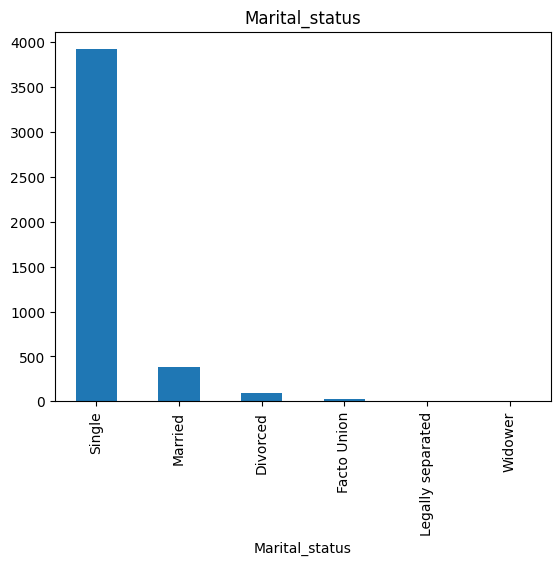

In [10]:
categorical_features = df.select_dtypes(include='object').columns
feature = categorical_features[0]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
df_sampel = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df_sampel)
count.plot(kind='bar', title=feature);

**Insight:** Dengan distribusi *Marital_Status* dapat disimpulkan bahwa kategori *Single* memiliki distribusi tertinggi dibanding kategori lain

           jumlah sampel  persentase
Displaced                           
Yes                 2426        54.8
No                  1998        45.2


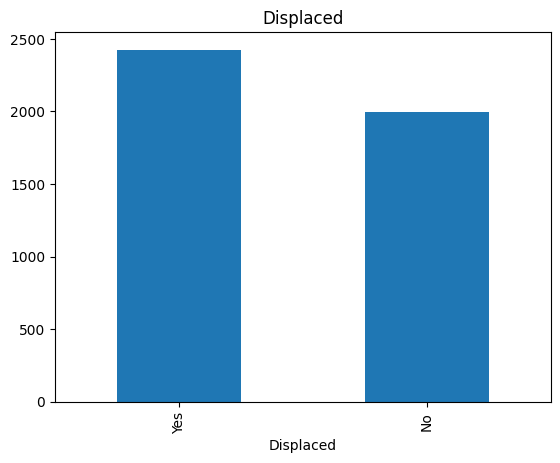

In [11]:
categorical_features = df.select_dtypes(include='object').columns
feature = categorical_features[1]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
df_sampel = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df_sampel)
count.plot(kind='bar', title=feature);

**Insight:** jika dilihat pada distribusi ini mayoritas mahasiswa berasal dari luar daerah dengan presentase 54.8%

        jumlah sampel  persentase
Debtor                           
No               3921        88.6
Yes               503        11.4


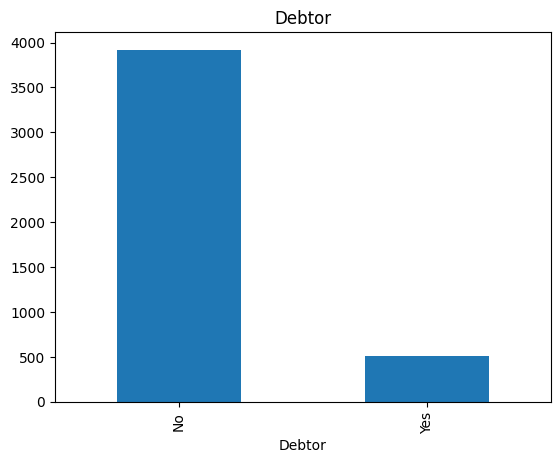

In [12]:
categorical_features = df.select_dtypes(include='object').columns
feature = categorical_features[2]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
df_sampel = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df_sampel)
count.plot(kind='bar', title=feature);

**Insight:** mayoritas individu (88.6%) tidak memiliki status sebagai Debtor, yaitu sebanyak 3.921 orang. Sementara itu, hanya 503 orang atau 11.4% yang berstatus sebagai Debtor

        jumlah sampel  persentase
Gender                           
Female           2868        64.8
Male             1556        35.2


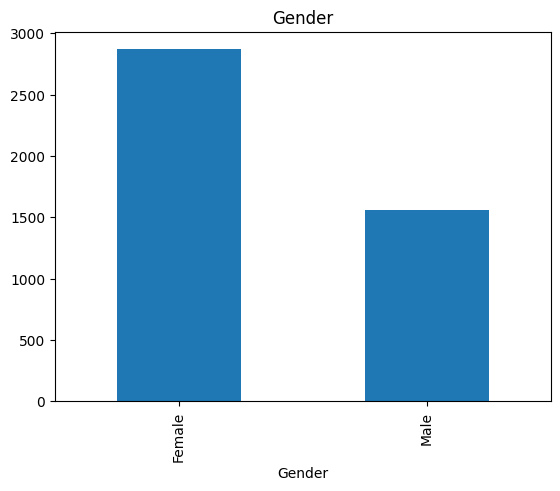

In [13]:
categorical_features = df.select_dtypes(include='object').columns
feature = categorical_features[3]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
df_sampel = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df_sampel)
count.plot(kind='bar', title=feature);

**Insight:** Distribusi gender dalam dataset menunjukkan bahwa terdapat ketimpangan proporsi antara pria dan wanita. Dari total sampel

                    jumlah sampel  persentase
Scholarship_holder                           
No                           3325        75.2
Yes                          1099        24.8


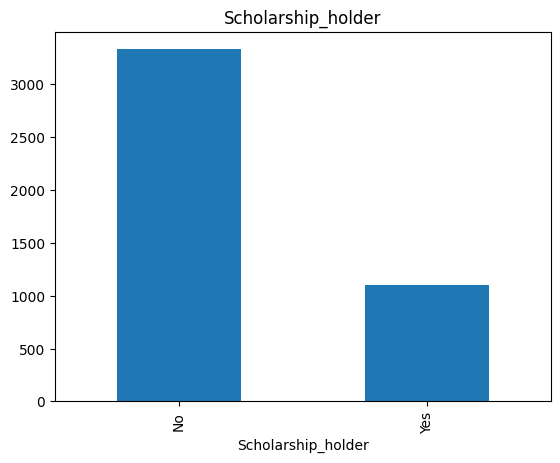

In [14]:
categorical_features = df.select_dtypes(include='object').columns
feature = categorical_features[4]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
df_sampel = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df_sampel)
count.plot(kind='bar', title=feature);

**Insight:** mayoritas individu bukan penerima beasiswa, yaitu sebanyak 3.325 orang (75.2%), sementara 1.099 orang (24.8%) tercatat sebagai penerima beasiswa

               jumlah sampel  persentase
International                           
No                      4314        97.5
Yes                      110         2.5


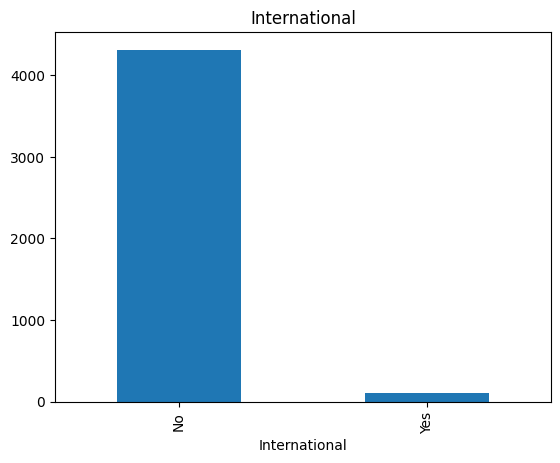

In [15]:
categorical_features = df.select_dtypes(include='object').columns
feature = categorical_features[5]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
df_sampel = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df_sampel)
count.plot(kind='bar', title=feature);

**Insight:** Data menunjukkan bahwa sebagian besar individu dalam dataset merupakan bukan mahasiswa internasional, yaitu sebanyak 4.314 orang (97.5%), sedangkan hanya 110 orang (2.5%) yang tercatat sebagai mahasiswa internasional.

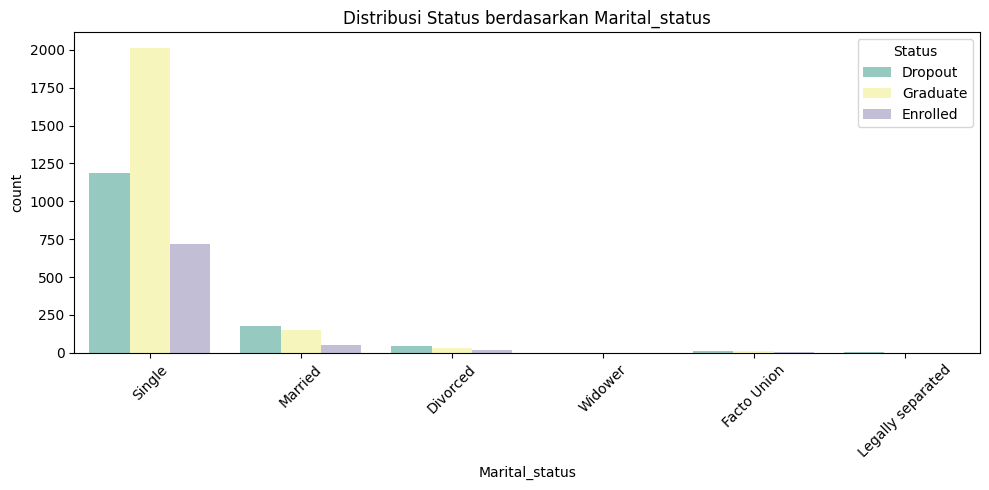

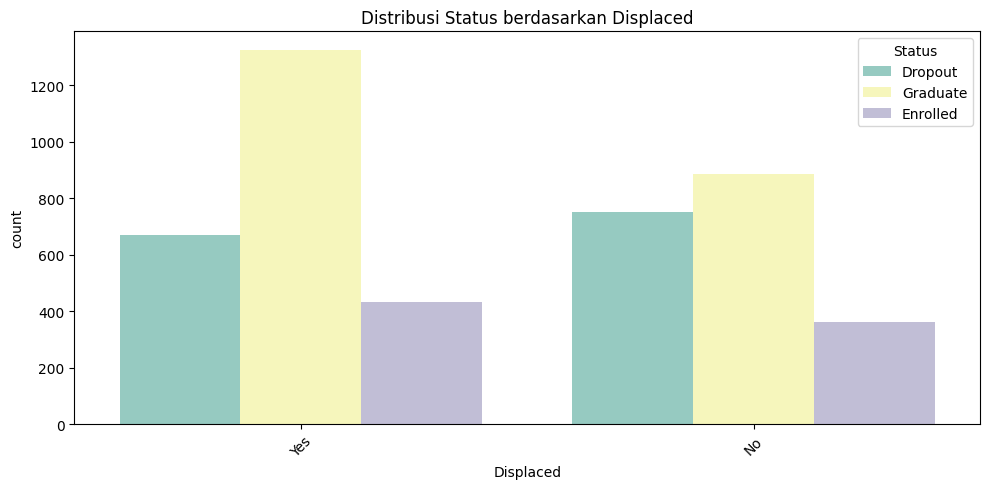

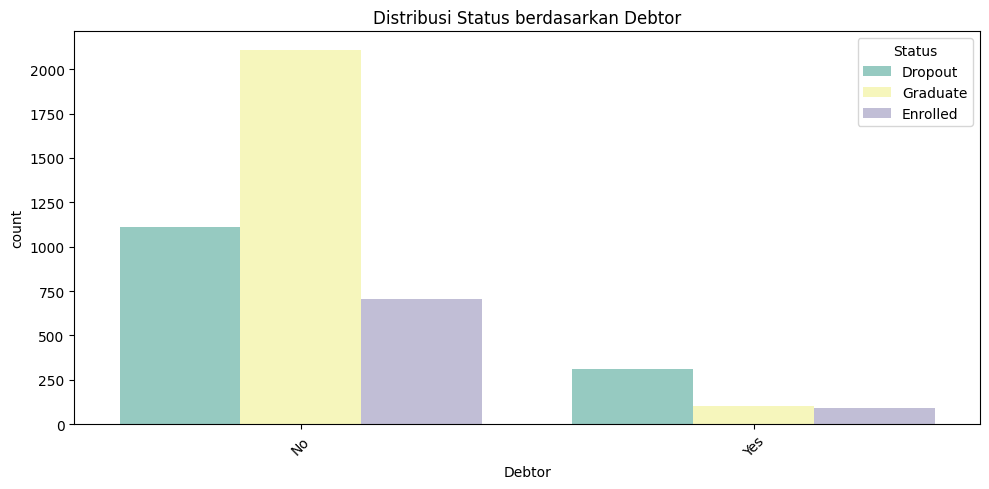

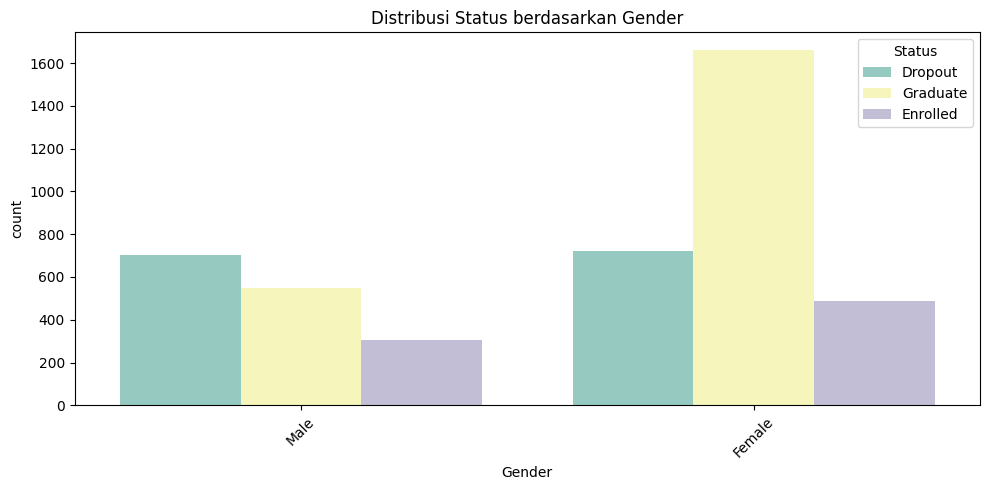

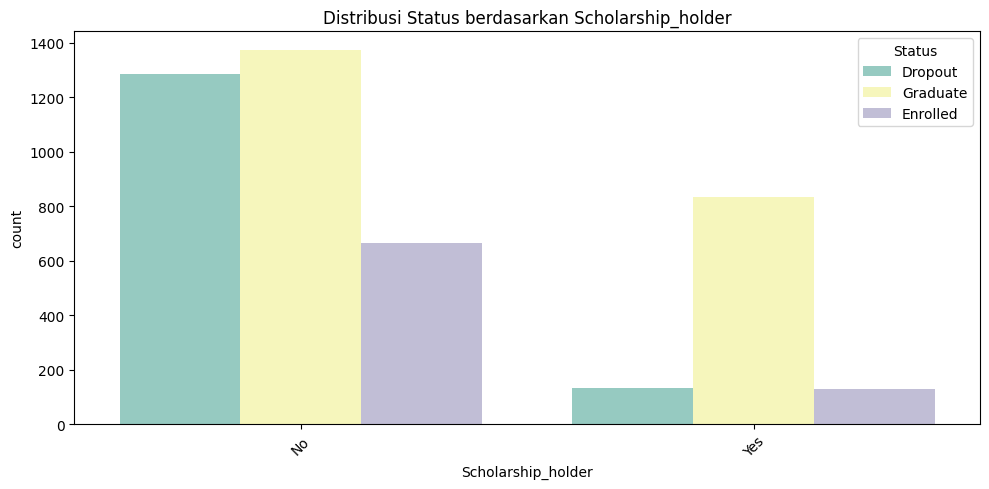

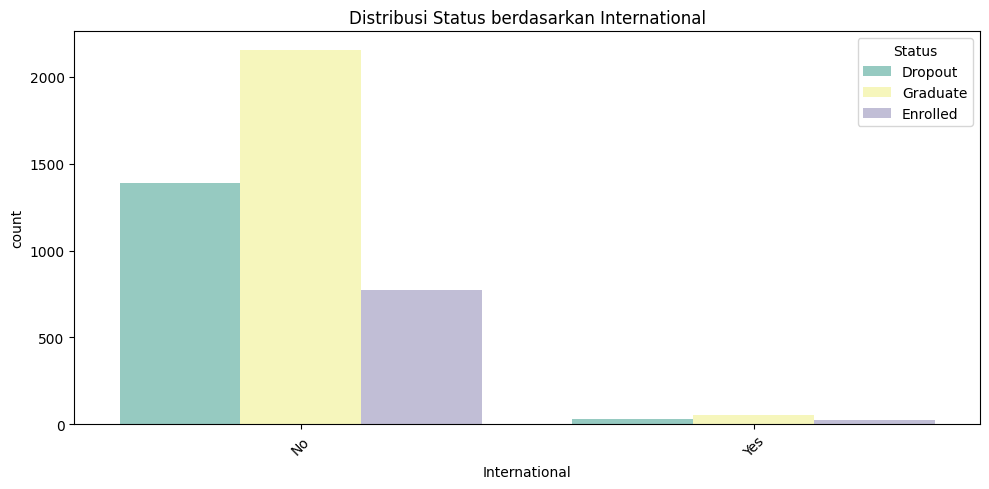

In [16]:
cat_features = df.select_dtypes(include='object').columns.to_list()
cat_features.remove("Status")

for col in cat_features:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x=col, hue="Status", palette="Set3")
    plt.title(f"Distribusi Status berdasarkan {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

**Insight:**
1. Status Pernikahan (Marital_status):
Mayoritas mahasiswa berstatus lajang (Single), dan sebagian besar dari mereka telah lulus. Mahasiswa yang sudah/ pernah menikah jumlahnya jauh lebih sedikit, dan distribusi status akademiknya relatif seimbang. Artinya, status pernikahan tidak terlalu berpengaruh terhadap keberhasilan studi, namun mahasiswa lajang mendominasi populasi.

2. Status Debitur (Debtor):
Mahasiswa tanpa utang lebih banyak dan memiliki tingkat kelulusan yang tinggi. Sebaliknya, mahasiswa yang memiliki utang cenderung lebih banyak yang dropout, menunjukkan bahwa beban finansial dapat berdampak negatif pada kelancaran studi.

3. Jenis Kelamin (Gender):
Mahasiswa perempuan memiliki tingkat kelulusan lebih tinggi dibanding laki-laki. Sementara dropout relatif seimbang di antara keduanya, ini mengindikasikan perempuan cenderung lebih berhasil secara akademik.

4. Status Pengungsi (Displaced):
Baik mahasiswa pengungsi maupun non-pengungsi menunjukkan tingkat kelulusan tinggi. Namun, dropout lebih banyak terjadi pada mahasiswa non-pengungsi, yang mungkin menunjukkan motivasi lebih tinggi pada kelompok pengungsi.

5. Kepemilikan Beasiswa (Scholarship_holder):
Penerima beasiswa meskipun lebih sedikit jumlahnya, menunjukkan proporsi kelulusan yang tinggi. Ini menandakan bahwa beasiswa mendukung keberhasilan akademik mahasiswa.

6. Status Internasional (International):
Mayoritas mahasiswa adalah lokal. Meski jumlah mahasiswa internasional sangat kecil, proporsi kelulusan mereka cukup tinggi, menunjukkan performa akademik yang baik.

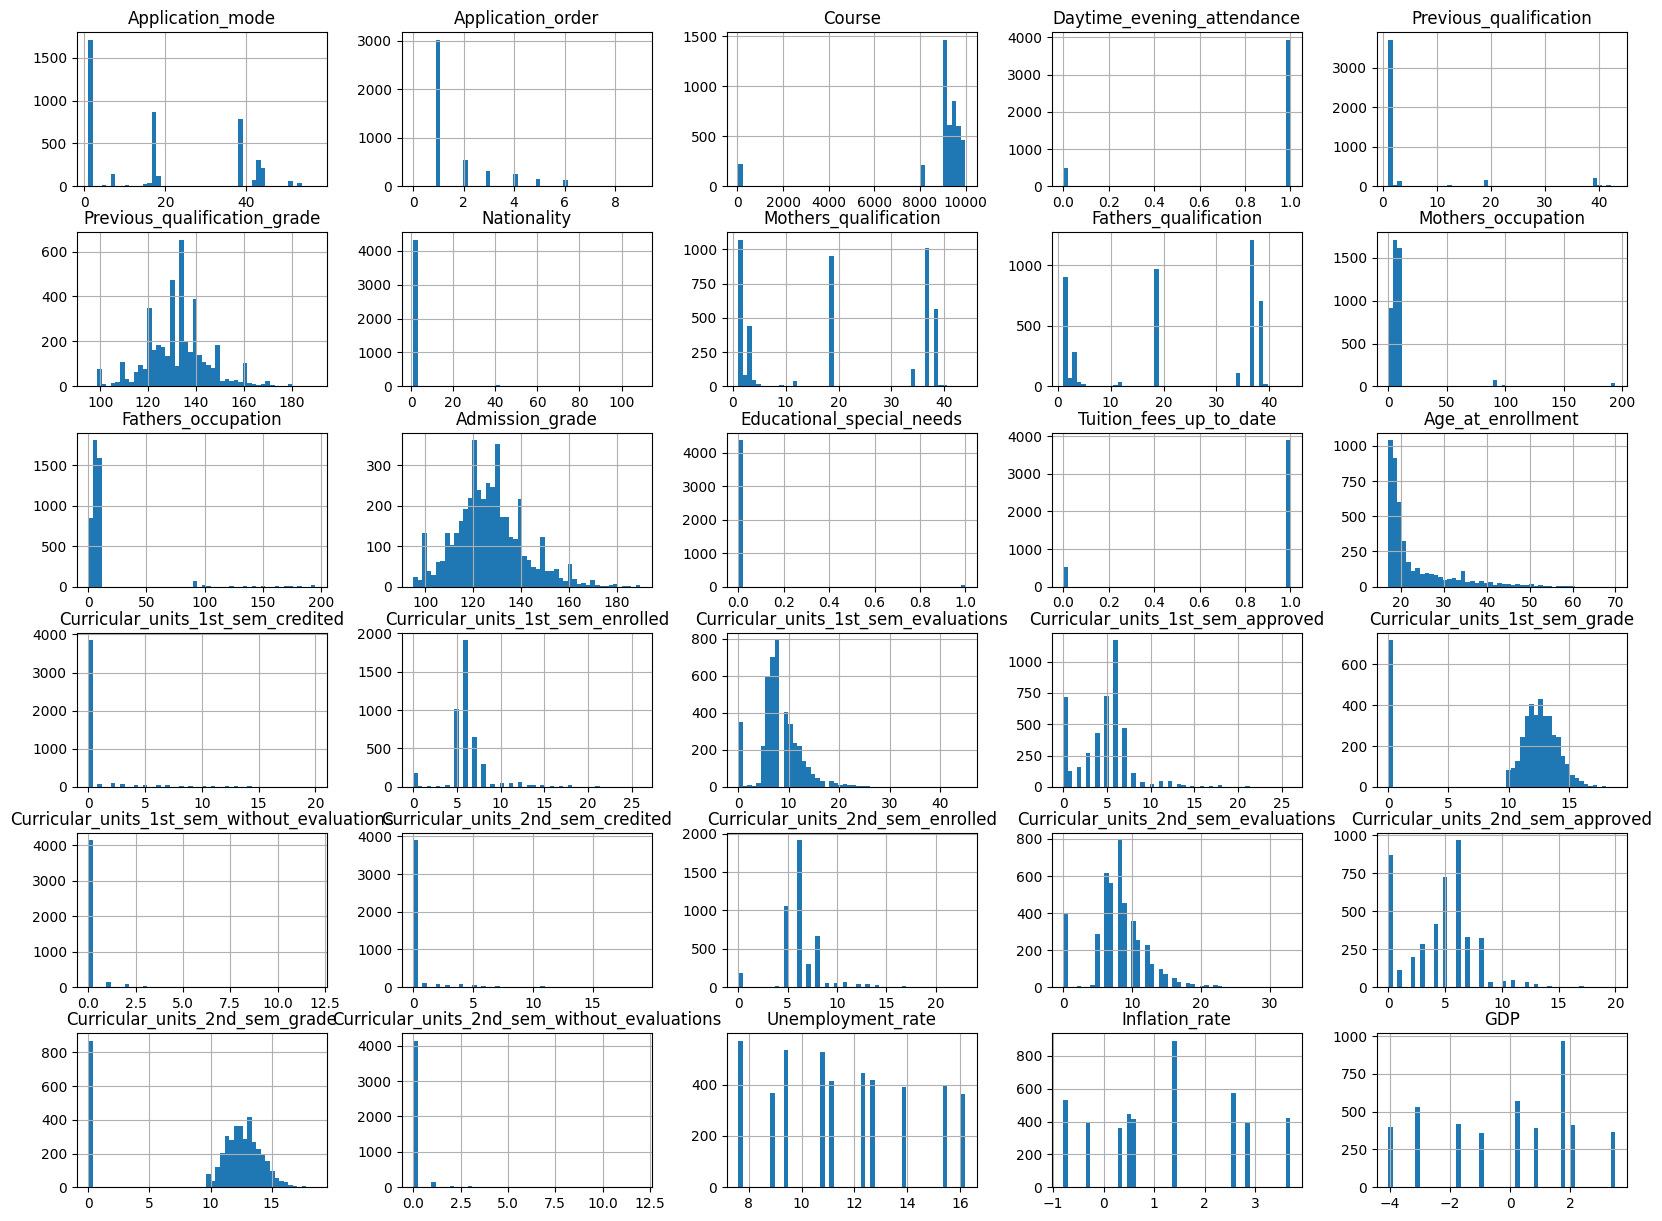

In [17]:
df.hist(bins=50, figsize=(20,15))
plt.show()

**Insight:** visualisasi histogram yang ditampilkan, terlihat bahwa sebagian besar fitur dalam dataset memiliki distribusi yang tidak merata. Banyak fitur kategorikal seperti Application_mode, Application_order, Daytime_evening_attendance, dan Nationality didominasi oleh satu atau dua nilai tertentu, yang mengindikasikan bahwa sebagian besar mahasiswa memiliki karakteristik atau latar belakang yang serupa dalam hal pendaftaran dan kebangsaan.

Selain itu, usia saat mendaftar (Age_at_enrollment) cenderung terkonsentrasi pada usia muda, yang mencerminkan bahwa mayoritas mahasiswa masuk perguruan tinggi pada usia yang relatif dini.

In [18]:
sns.pairplot(df, diag_kind = 'kde')

     Status  total_status
0   Dropout          1421
1  Enrolled           794
2  Graduate          2209


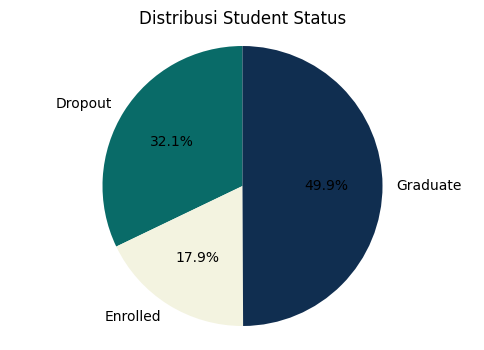

In [19]:
status_counts = df.groupby("Status").size().reset_index(name="total_status")
print(status_counts)

# Plot pie chart
plt.figure(figsize=(6, 4))
colors = ['#096B68', '#F3F3E0', '#102E50']
plt.pie(
    status_counts["total_status"],
    labels=status_counts["Status"],
    autopct='%1.1f%%',
    startangle=90,
    colors=colors
)
plt.title("Distribusi Student Status")
plt.axis('equal')
plt.show()

**Insight:** mayoritas distribusi adalah mahasiswa yang lulus sebesar 49.9%.  proporsi siswa yang DO juga cukup besar, mencapai 32.1%

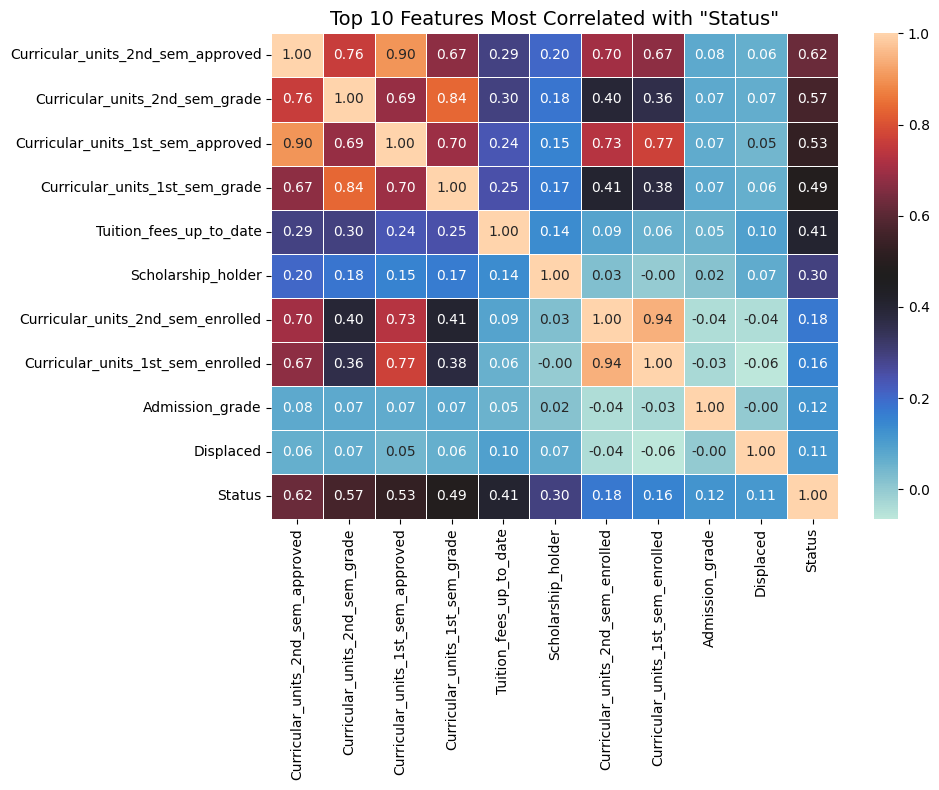

In [20]:
def plot_top_correlated_heatmap(df, target_column='Status', top_n=10, figsize=(10, 8)):
    """
    Visualisasi heatmap korelasi untuk fitur-fitur yang paling berkorelasi dengan kolom target.

    Args:
        df (pd.DataFrame): DataFrame input dengan fitur numerik dan kategorikal.
        target_column (str): Nama kolom target yang dianalisis korelasinya.
        top_n (int): Jumlah fitur teratas berdasarkan korelasi yang ingin ditampilkan.
        figsize (tuple): Ukuran gambar heatmap.

    Returns:
        None
    """
    df_encoded = df.copy()

    # Label encode semua kolom kategorikal (termasuk kolom target)
    categorical_cols = df_encoded.select_dtypes(include='object').columns

    for col in categorical_cols:
        le = LabelEncoder()
        df_encoded[col] = le.fit_transform(df_encoded[col])

    # Hitung matriks korelasi
    corr_matrix = df_encoded.corr(numeric_only=True)

    # Ambil korelasi dengan target_column
    corr_with_target = corr_matrix[target_column].drop(target_column).sort_values(ascending=False)

    # Ambil top N fitur
    top_features = corr_with_target.head(top_n).index.tolist()

    # Tambahkan kolom target ke dalam daftar
    selected_cols = top_features + [target_column]

    # Buat heatmap
    plt.figure(figsize=figsize)
    sns.heatmap(df_encoded[selected_cols].corr(), annot=True, cmap='icefire', fmt='.2f', linewidths=0.5)
    plt.title(f'Top {top_n} Features Most Correlated with "{target_column}"', fontsize=14)
    plt.tight_layout()
    plt.show()

# 🔧 Panggil fungsi dengan DataFrame kamu:
plot_top_correlated_heatmap(df, target_column='Status', top_n=10)


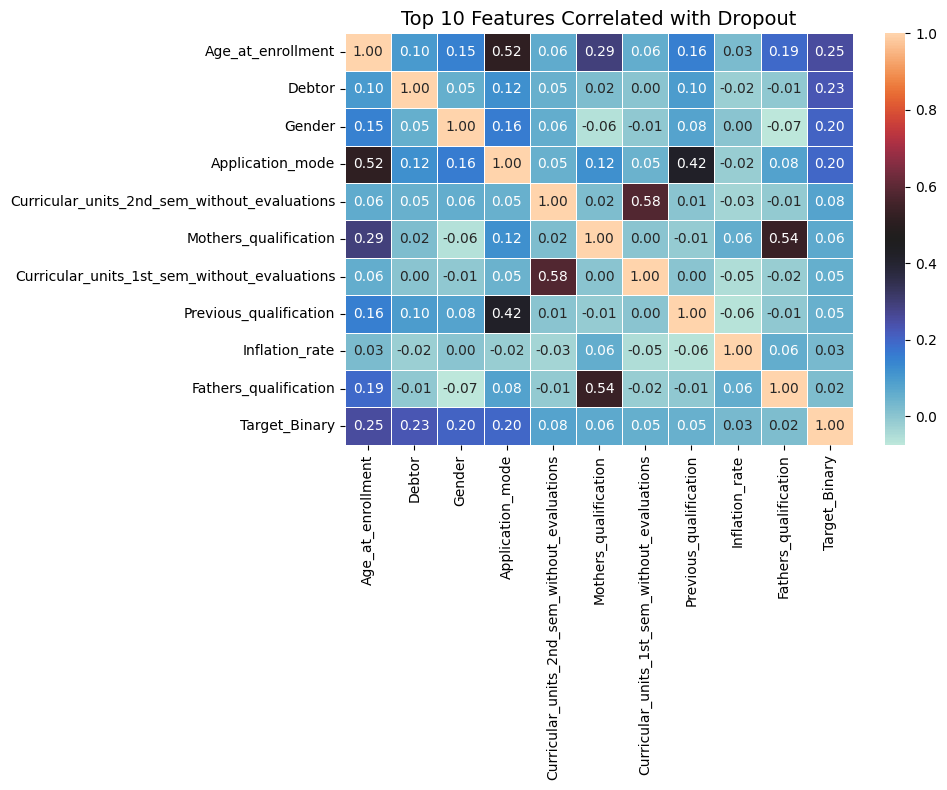

In [21]:
def correlation_with_dropout(df, status_column='Status', target_status='Dropout'):
    """
    Mengubah kolom status menjadi biner (1 untuk target_status, 0 untuk lainnya),
    kemudian menghitung korelasi antara setiap kolom dengan kolom target tersebut.

    Returns:
        pd.DataFrame: DataFrame korelasi (seri) terhadap kolom biner Dropout.
    """
    df_encoded = df.copy()

    # Binerisasi kolom status: 1 untuk Dropout, 0 untuk lainnya
    df_encoded['Target_Binary'] = (df_encoded[status_column] == target_status).astype(int)

    # Label encode semua kolom kategorikal (object dan category)
    categorical_cols = df_encoded.select_dtypes(include=['object', 'category']).columns
    for col in categorical_cols:
        le = LabelEncoder()
        df_encoded[col] = le.fit_transform(df_encoded[col])

    # Hitung korelasi terhadap kolom biner
    corr_matrix = df_encoded.corr(numeric_only=True)
    dropout_corr = corr_matrix['Target_Binary'].drop('Target_Binary').sort_values(ascending=False)

    return dropout_corr, df_encoded  # return juga dataframe terencode untuk keperluan heatmap

def plot_dropout_heatmap(df, status_column='Status', target_status='Dropout', top_n=10, figsize=(10, 8)):
    """
    Visualisasi heatmap dari korelasi fitur-fitur dengan status Dropout dalam top-N fitur.

    Returns:
        None
    """
    dropout_corr, df_encoded = correlation_with_dropout(df, status_column, target_status)

    # Ambil top-n fitur paling berkorelasi dengan dropout
    top_features = dropout_corr.head(top_n).index.tolist()

    # Tambahkan kolom target biner ke daftar
    selected_cols = top_features + ['Target_Binary']

    # Buat heatmap korelasi
    plt.figure(figsize=figsize)
    sns.heatmap(df_encoded[selected_cols].corr(), annot=True, cmap='icefire', fmt='.2f', linewidths=0.5)
    plt.title(f'Top {top_n} Features Correlated with {target_status}', fontsize=14)
    plt.tight_layout()
    plt.show()

# 🔧 Contoh pemanggilan fungsi:
plot_dropout_heatmap(df, status_column='Status', target_status='Dropout', top_n=10)

In [24]:
from google.colab import files
df.to_csv('student_analysis.csv', index=False)

# Feature Selection

Fitur yang dipilih bedasarkan korelasi tertinggi pada visualisasi heatmap

- Curricular_units_2nd_sem_approved
- curricular_units_2nd_sem_grade
- Curricular_units_1st_sem_approved
- Curricular_units_1st_sem_grade
- Tuition_fees_up_to_date
- Scholarship_holder

**Target:** Status


In [25]:
features = [
    'Curricular_units_2nd_sem_approved',
    'Curricular_units_2nd_sem_grade',
    'Curricular_units_1st_sem_approved',
    'Curricular_units_1st_sem_grade',
    'Tuition_fees_up_to_date',
    'Scholarship_holder',
    'Status'  # target/label
]
df_selected = df[features]

Membuat dataframe baru yang hanya berisi kolom-kolom yang ada dalam daftar features

In [26]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 7 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Curricular_units_2nd_sem_approved  4424 non-null   int64  
 1   Curricular_units_2nd_sem_grade     4424 non-null   float64
 2   Curricular_units_1st_sem_approved  4424 non-null   int64  
 3   Curricular_units_1st_sem_grade     4424 non-null   float64
 4   Tuition_fees_up_to_date            4424 non-null   int64  
 5   Scholarship_holder                 4424 non-null   object 
 6   Status                             4424 non-null   object 
dtypes: float64(2), int64(3), object(2)
memory usage: 242.1+ KB


semua kolom memiliki jumlah nilai non-null yang sama dan tidak memiliki missing values

In [27]:

# Mapping target
status_mapping = {
    "Dropout": 1,
    "Enrolled": 0,
    "Graduate": 0
}
df_selected = df_selected.copy()
df_selected['Status'] = df_selected['Status'].map(status_mapping)

# Fitur
numeric_features = [
    'Curricular_units_2nd_sem_approved',
    'Curricular_units_2nd_sem_grade',
    'Curricular_units_1st_sem_approved',
    'Curricular_units_1st_sem_grade'
]
categorical_features = ['Tuition_fees_up_to_date', 'Scholarship_holder']

# Preprocessing
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop=None, sparse_output=True)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Pipeline
pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('classifier', XGBClassifier(
        eval_metric='logloss',
        random_state=42
    ))
])

In [28]:
# Train-test split
X = df_selected.drop(columns='Status')
y = df_selected['Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)
print("Jumlah data train:", X_train.shape[0])
print("Jumlah data test:", X_test.shape[0])

Jumlah data train: 3539
Jumlah data test: 885


## Modeling

In [29]:
# Fit
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

# Evaluation
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.91      0.89       601
           1       0.79      0.74      0.76       284

    accuracy                           0.85       885
   macro avg       0.83      0.82      0.83       885
weighted avg       0.85      0.85      0.85       885



In [30]:
# Parameter grid
param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [3, 5, 7],
    'classifier__learning_rate': [0.01, 0.1, 0.2],
    'classifier__subsample': [0.8, 1.0]
}

# Grid search
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='f1',  # fokus pada Dropout (class 1)
    verbose=2,
    n_jobs=-1
)

# Fit ke data training
grid_search.fit(X_train, y_train)

# Hasil tuning
print("Best parameters found: ", grid_search.best_params_)
print("Best F1 Score (CV): ", grid_search.best_score_)

# Evaluasi di test set
y_pred = grid_search.predict(X_test)
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters found:  {'classifier__learning_rate': 0.01, 'classifier__max_depth': 3, 'classifier__n_estimators': 200, 'classifier__subsample': 0.8}
Best F1 Score (CV):  0.7614273309598428
              precision    recall  f1-score   support

           0       0.89      0.92      0.91       601
           1       0.82      0.76      0.79       284

    accuracy                           0.87       885
   macro avg       0.86      0.84      0.85       885
weighted avg       0.87      0.87      0.87       885



In [31]:
import joblib
import pickle

# Objek model terbaik dari GridSearch
model = grid_search.best_estimator_

# Simpan sebagai .joblib
joblib.dump(model, 'best_model.joblib')

# Simpan sebagai .pkl
with open('best_model.pkl', 'wb') as f:
    pickle.dump(model, f)

## Evaluation

=== Classification Report ===
                   precision    recall  f1-score   support

Enrolled/Graduate       0.89      0.92      0.91       601
          Dropout       0.82      0.76      0.79       284

         accuracy                           0.87       885
        macro avg       0.86      0.84      0.85       885
     weighted avg       0.87      0.87      0.87       885



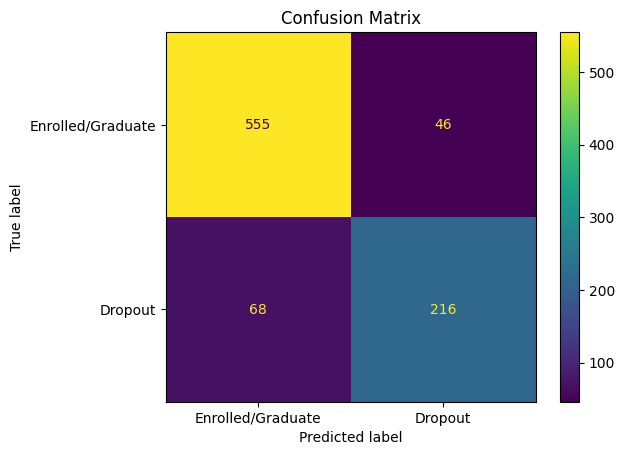

In [32]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Prediksi dari model terbaik
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Classification report
print("=== Classification Report ===")
print(classification_report(y_test, y_pred, target_names=["Enrolled/Graduate", "Dropout"]))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Enrolled/Graduate", "Dropout"])
disp.plot()
plt.title("Confusion Matrix")
plt.show()


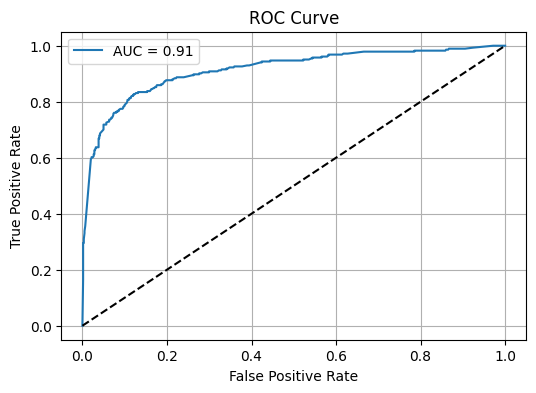

In [33]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Prediksi probabilitas untuk class 1 (Dropout)
y_proba = best_model.predict_proba(X_test)[:, 1]

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
auc_score = roc_auc_score(y_test, y_proba)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()


Model yang telah dituning menunjukkan performa yang cukup baik, dengan akurasi sebesar 0.87 dan ROC Curve sebesar 0.91. Nilai ini mencerminkan kemampuan model yang tinggi dalam membedakan antara kelas positif dan negatif.

In [34]:
dummy_data = pd.DataFrame([{
    'Curricular_units_2nd_sem_approved': 1,
    'Curricular_units_2nd_sem_grade': 2,
    'Curricular_units_1st_sem_approved': 6,
    'Curricular_units_1st_sem_grade': 9,
    'Tuition_fees_up_to_date': 1, # yes
    'Scholarship_holder': 'No'
}])


In [35]:
def evaluate_dummy(model, dummy_df):
    prob = model.predict_proba(dummy_df)[0]
    pred = model.predict(dummy_df)[0]
    status = "Dropout (Likely to dropout)" if pred == 1 else "Graduate/Enrolled (Not likely to dropout)"
    print(f"Prediction: {status}")
    print(f"Probability of Graduate: {prob[0]:.2f}%, Probability of Dropout: {prob[1]:.2f}%")

In [36]:
evaluate_dummy(best_model, dummy_data)

Prediction: Dropout (Likely to dropout)
Probability of Graduate: 0.41%, Probability of Dropout: 0.59%


In [37]:
!pip install pipreqs

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 798.3/798.3 kB 15.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 52.1 MB/s eta 0:00:00
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=f044e7044728003969fe37935e3512b22a03074334eacad0fec22985694b5dfa
  Stored in directory: /root/.cache/pip/wheels/1a/b0/8c/4b75c4116c31f83c8f9f047231251e13cc74481cca4a78a9ce
Successfully built docopt
  Attempting uninstall: ipython
    Found existing installation: ipython 7.34.0
    Uninstalling ipython-7.34.0:
      Successfully uninstalled ipython-7.34.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires ipython==7.34.0, but you have ipython 8.12.3 which is incompatible.


In [38]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [39]:
!pipreqs '/content/drive/MyDrive/dicoding/submission/submission_penerapan_data_science/penerapan_data_science' --force --scan-notebooks --encoding=utf-8

Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
INFO: Successfully saved requirements file in /content/drive/MyDrive/dicoding/submission/submission_penerapan_data_science/penerapan_data_science/requirements.txt
